# Importing all the neccessary libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data set

In [57]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Understanding the dataset

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [59]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [61]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Finding the null values

In [62]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

--> We can see that columns Description, CustomerID are having null values

In [63]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


--> there were 5286 duplicated columns

# Data Cleaning & Manipulation

--> Dropping rows without CustomerID

In [64]:
df_clean = df.dropna(subset = 'CustomerID').copy()

--> Removing cancelled orders: In InvoiceNo starting with 'C'  are cancelled orders

--> To avoid negative/returned transactions.

In [65]:
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

In [66]:
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

--> Converting InvoiceDate to datetime

In [67]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')

--> Converting to numeric columns

In [68]:
df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'], errors='coerce')
df_clean['UnitPrice'] = pd.to_numeric(df_clean['UnitPrice'], errors='coerce')

--> Removing non-positive quantity and unit price if there are negative values

In [69]:
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

--> Dropping any remaining rows with NaNs in key columns of our dataframe

In [70]:
df_clean = df_clean.dropna(subset=['InvoiceDate', 'Quantity', 'UnitPrice', 'CustomerID'])

--> Creating TotalAmount column based on quantity and unitprice

In [71]:
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

--> Extracting month and year based on invoicedate column 

In [72]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.month
df_clean['InvoiceYear'] = df_clean['InvoiceDate'].dt.year

--> Resetting the index

In [73]:
df_clean = df_clean.reset_index(drop=True)

--> Saving our cleaned dataset into csv format

In [74]:
df_clean.to_csv('cleaned_sales_data.csv', index=False)

# Exploratory Data Analysis

--> Finding top 10 products by quantity sold

In [77]:
Top_products_qty = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
print("Top 10 products by quantity:\n", Top_products_qty)

Top 10 products by quantity:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


--> Finding top countries by revenue

In [78]:
top_countries_revenue = df_clean.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 countries by total revenue:\n", top_countries_revenue)


Top 5 countries by total revenue:
 Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalAmount, dtype: float64


--> Finding months with highest and lowest sales (across all years)

In [79]:
monthly_sales = df_clean.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalAmount'].sum().sort_values()
monthly_sales

C:\Users\hemasatish\AppData\Local\Temp\ipykernel_8612\64579949.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_clean.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalAmount'].sum().sort_values()


InvoiceDate
2011-02-28     447137.350
2011-04-30     469200.361
2011-12-31     518192.790
2011-01-31     569445.040
2010-12-31     572713.890
2011-03-31     595500.760
2011-07-31     600091.011
2011-08-31     645343.900
2011-06-30     661213.690
2011-05-31     678594.560
2011-09-30     952838.382
2011-10-31    1039318.790
2011-11-30    1161817.380
Name: TotalAmount, dtype: float64

In [85]:
print("\nMonth with lowest sales:", monthly_sales.index[0].strftime('%Y-%m'), monthly_sales.iloc[0])
print("Month with highest sales:", monthly_sales.index[-1].strftime('%Y-%m'), monthly_sales.iloc[-1])


Month with lowest sales: 2011-02 447137.35
Month with highest sales: 2011-11 1161817.3800000001


In [ ]:
--> Finding most frequent customers (by number of invoices)

In [86]:
cust_freq = df_clean.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
print("\nTop 10 customers by number of orders:\n", cust_freq)


Top 10 customers by number of orders:
 CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64


--> Finding average order value per country

In [90]:
order_vals = df_clean.groupby(['InvoiceNo','Country'])['TotalAmount'].sum().reset_index()
order_vals

,InvoiceNo,Country,TotalAmount
0,536365,United Kingdom,139.12
1,536366,United Kingdom,22.20
2,536367,United Kingdom,278.73
3,536368,United Kingdom,70.05
4,536369,United Kingdom,17.85
...,...,...,...
18527,581583,United Kingdom,124.60
18528,581584,United Kingdom,140.64
18529,581585,United Kingdom,329.05
18530,581586,United Kingdom,339.20


In [91]:
avg_order_value_country = order_vals.groupby('Country')['TotalAmount'].mean().sort_values(ascending=False).head(10)
print("\nAverage order value (top 10 countries):\n", avg_order_value_country)


Average order value (top 10 countries):
 Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2430.198421
Japan          1969.282632
Lebanon        1693.880000
Israel         1444.338000
Brazil         1143.600000
Switzerland    1106.744118
Sweden         1066.064722
Denmark        1053.074444
Name: TotalAmount, dtype: float64


### Visualizations

--> Finding trends of sales

In [98]:
plt.rcParams['figure.figsize'] = (8,6)
sns.set_style('darkgrid')

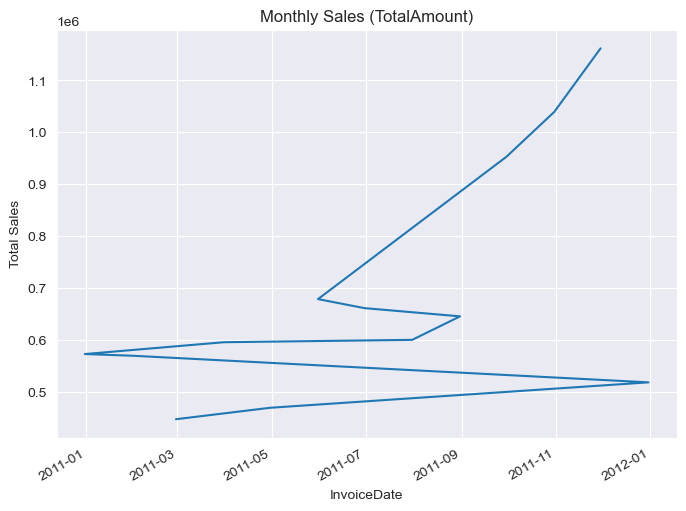

In [99]:
monthly_sales.plot(title='Monthly Sales (TotalAmount)', legend=False)
plt.ylabel('Total Sales')
plt.show()

--> Top products (Bar chart)

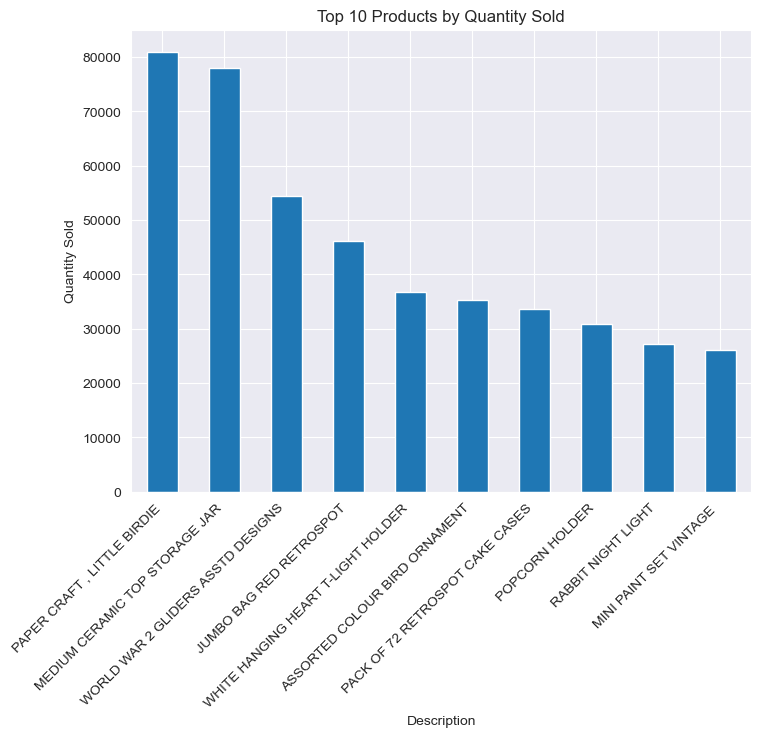

In [101]:
Top_products_qty.plot(kind='bar', title='Top 10 Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

--> Heatmap for corelation of numeric features

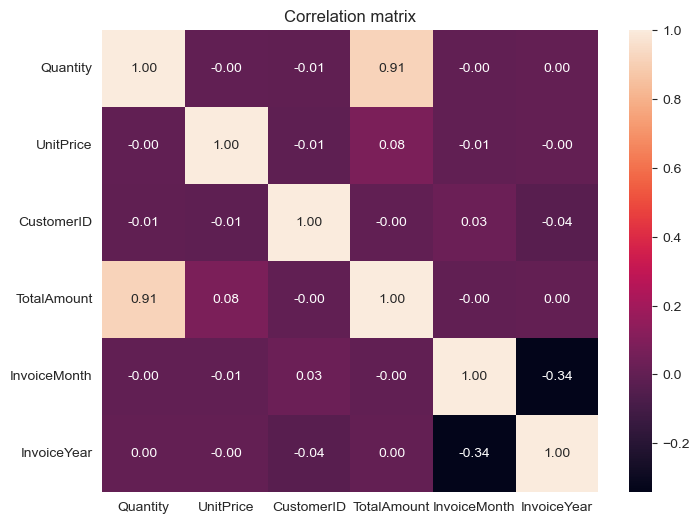

In [118]:
numeric_cols = df_clean.select_dtypes(['int','float']).columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

## Key Insights

In [122]:
total_sales = df_clean['TotalAmount'].sum()
avg_order_value = df_clean.groupby('InvoiceNo')['TotalAmount'].sum().mean()
unique_customers = df_clean['CustomerID'].nunique()
top_region = df_clean.groupby('Country')['TotalAmount'].sum().head()

In [123]:
print(f"Total Sales: {total_sales:.2f}")
print(f"Average Order Value: {avg_order_value:.2f}")
print(f"Unique Customers: {unique_customers}")
print(f"Top Country by Revenue: {top_region}")

Total Sales: 8911407.90
Average Order Value: 480.87
Unique Customers: 4338
Top Country by Revenue: Country
Australia    138521.31
Austria       10198.68
Bahrain         548.40
Belgium       41196.34
Brazil         1143.60
Name: TotalAmount, dtype: float64


# Final Insights

--> The top 10 products contribute a significant portion of total revenue and quantity sold.

--> Low-selling products can be reviewed for potential discontinuation or replacement with better alternatives.

--> Monthly sales fluctuate significantly, with peak sales during certain months (e.g., November–December) and dips during off-peak months.

--> This insight can inform marketing campaigns, inventory stocking, and resource allocation for high-demand periods.

--> Analyzing trends helps plan seasonal promotions to increase revenue in slow months

--> Revenue is concentrated in a few countries (top 5 countries contribute majority of sales).

--> Business can prioritize logistics, marketing, and product localization in these regions.

--> Low-revenue regions may need market research or targeted campaigns to increase sales.

--> Average order value helps in identifying high-value transactions and opportunities for upselling.

--> High-frequency customers tend to purchase smaller or moderate order amounts, while top-spending customers may have infrequent but high-value orders.

--> Discounts for regular customers (e.g., loyalty rewards, bulk discounts, cross-selling) can maximize revenue across different segments.